In [1]:
# Author: Shreyas Shashikant Vaishnav
# Purpose: Clustering
# Question - Crime_Data

In [2]:
#Hierarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [52]:
crime_data = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Clustering\crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [63]:
crime_data_total = crime_data['Total'] = crime_data.sum(axis=1)
crime_data_total.head()

0    1313.6
1    1462.0
2    1652.4
3    1073.2
4    1666.4
dtype: float64

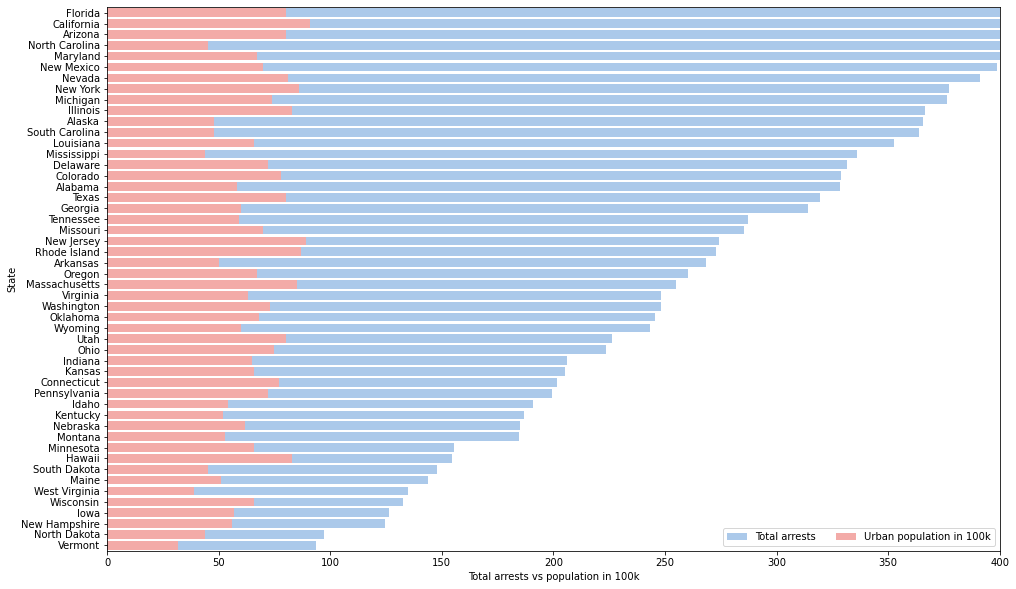

In [57]:
# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = crime_data.sort_values("Total", ascending=False)

# Plot the total. x= and y= are actual column names
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Unnamed: 0", data=stats,
            label="Total arrests", color="b")

# Plot the population
sns.barplot(x="UrbanPop", y="Unnamed: 0", data=stats,
            label="Urban population in 100k", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Total arrests vs population in 100k");

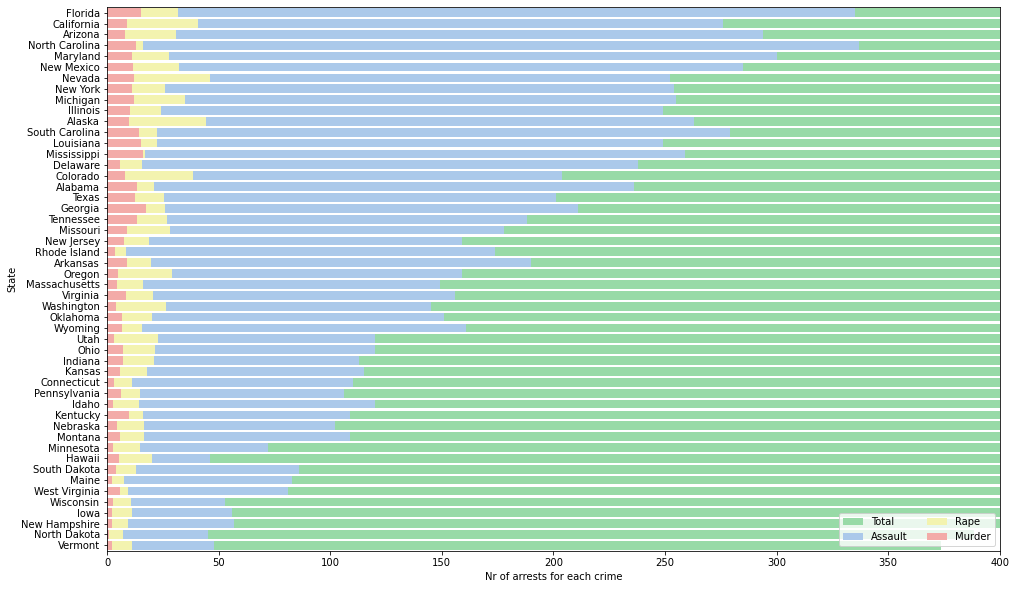

In [64]:
f, ax = plt.subplots(figsize=(16, 10))

stats = crime_data.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="Unnamed: 0", data=stats, label="Total", color="g")

sns.barplot(x="Assault", y="Unnamed: 0", data=stats, label="Assault", color="b")

sns.barplot(x="Rape", y="Unnamed: 0", data=stats, label="Rape", color="y")

sns.barplot(x="Murder", y="Unnamed: 0", data=stats, label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Nr of arrests for each crime");

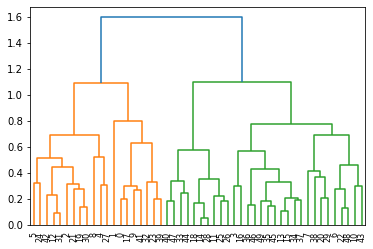

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

df_norm = norm_func(crime_data.iloc[:,1:])
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [5]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [6]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [7]:
Clusters.head()

,Clusters
0,0
1,1
2,0
3,0
4,0


In [8]:
# K-means Clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


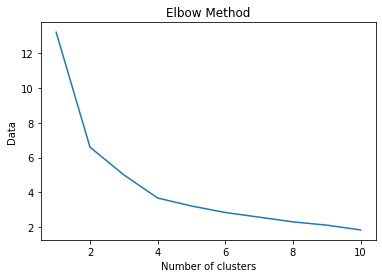

In [9]:
data = []
for i in range (1,11):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    data.append(kmeans.inertia_)
plt.plot(range(1, 11), data)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Data')
plt.show()

In [12]:
X = np.random.uniform(0,1,1000)
X

array([8.04969738e-01, 8.36166573e-01, 8.37459940e-01, 8.83162356e-01,
       1.86880277e-01, 8.78422245e-01, 5.98032963e-01, 2.70914569e-01,
       6.12376111e-01, 4.30677261e-01, 4.01208473e-01, 2.56491636e-01,
       8.26287218e-01, 1.39599535e-01, 4.33520051e-02, 7.16211766e-01,
       8.03013120e-01, 9.09220428e-01, 7.16429078e-01, 7.01579099e-01,
       7.63099412e-02, 4.89488190e-02, 8.02056973e-01, 8.35087023e-01,
       6.20706109e-01, 1.23012068e-02, 7.34701101e-01, 7.84721693e-01,
       4.63424234e-02, 1.53397554e-01, 2.45980233e-01, 6.52378324e-01,
       3.78988938e-01, 5.34620439e-01, 2.64292687e-01, 1.55316305e-01,
       4.51333144e-01, 4.54423358e-01, 7.23347435e-01, 1.53380404e-02,
       5.74490105e-01, 2.84206202e-01, 3.98801981e-01, 8.23896086e-01,
       7.85634555e-01, 5.95025816e-01, 9.08540334e-01, 4.53755113e-01,
       2.36760917e-01, 4.78680660e-01, 4.95562377e-01, 5.62390362e-01,
       8.25260363e-01, 5.79541982e-01, 6.68526000e-01, 2.19970196e-01,
      

In [13]:
crime_data_1 = crime_data

In [14]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

df_norm = norm_func(crime_data_1.iloc[:,1:])

df_norm.head(10)  

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [71]:
X = crime_data_1[['Murder', 'Assault', 'Rape', 'UrbanPop']]
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_clusters,cluster_errors
0,1,355807.821600
1,2,96399.028144
2,3,47964.265357
3,4,34728.629357
4,5,24417.023524
5,6,18768.000667
6,7,15570.937333
7,8,13285.616921
8,9,11405.110476
9,10,10080.655476


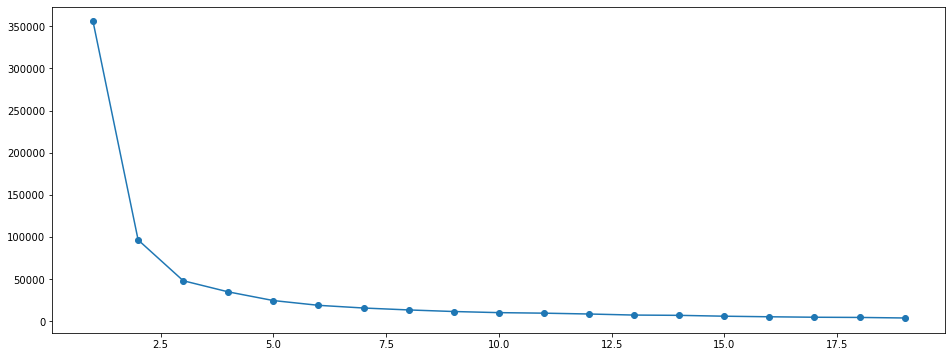

In [72]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [81]:
X = crime_data_1[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

crime_data_1['Crime_clusters'] = clusters.labels_
crime_data_1.head()
crime_data_1.sort_values(by=['Crime_clusters'],ascending = True)
X.head()
crime_data_1.head()

,Murder,Assault,UrbanPop,Rape,KMeans_labels,Crime_clusters
0,13.2,236,58,21.2,3,2
1,10.0,263,48,44.5,0,2
2,8.1,294,80,31.0,0,2
3,8.8,190,50,19.5,3,0
4,9.0,276,91,40.6,0,2


In [77]:
#X1 = X['Total'] = X.sum(axis=1)
#X2 = pd.concat([X,X1])
#X2.head()



<ipython-input-77-303544c2638a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1 = X['Total'] = X.sum(axis=1)


,0,Assault,Murder,Rape,Total,UrbanPop
0,NaN,236.0,13.2,21.2,656.8,58.0
1,NaN,263.0,10.0,44.5,731.0,48.0
2,NaN,294.0,8.1,31.0,826.2,80.0
3,NaN,190.0,8.8,19.5,536.6,50.0
4,NaN,276.0,9.0,40.6,833.2,91.0


In [92]:
crime_data_X = crime_data_1

In [93]:
crime_data_X["Total"] = crime_data_1["Assault"] +  crime_data_1["Murder"] +  crime_data_1["Rape"] +  crime_data_1["UrbanPop"]
#crime_data_X.head()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


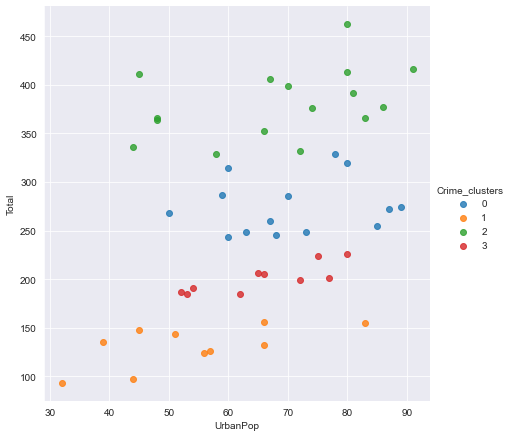

In [101]:
sns.set_style("darkgrid")
sns.lmplot('UrbanPop' ,'Total', data=crime_data_X, hue = "Crime_clusters", fit_reg=False, size = 6)

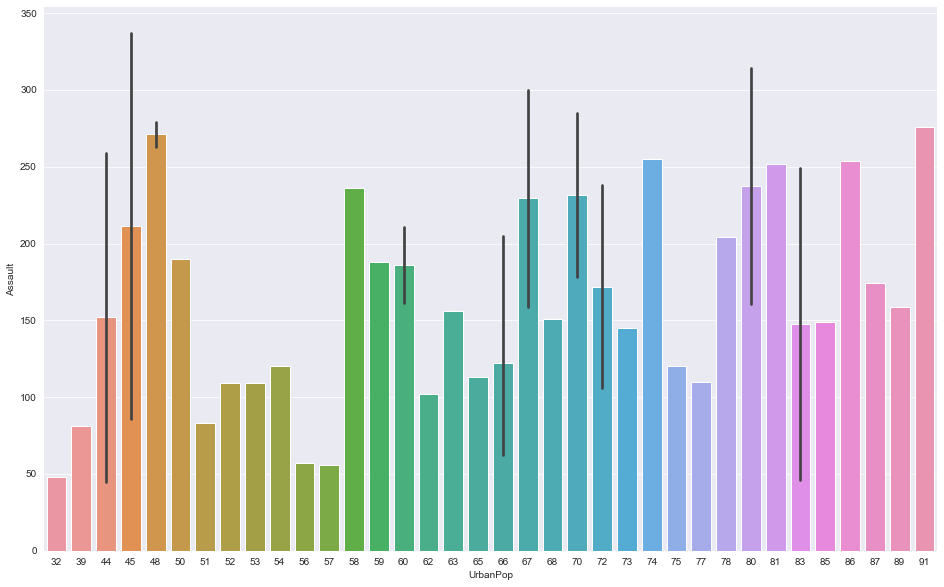

In [102]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))
sns.set_style("darkgrid")
# Load the dataset
stats = crime_data_1.sort_values([ "Crime_clusters", "UrbanPop"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="Assault", x="UrbanPop", data=stats)

sns.despine(left=True, bottom=True)

In [70]:
model=KMeans(n_clusters=4) 
model.fit(df_norm)
model.labels_


array([3, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3, 0, 2, 1, 2,
       0, 3, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 0, 1])

In [17]:
md=pd.Series(model.labels_)
crime_data_1['clust']=md 
crime_data_1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [18]:
crime_data_1.iloc[:,1:5].groupby(crime_data_1.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.966667,264.000000,76.500000,33.608333
2,5.852941,141.176471,73.647059,19.335294
3,13.937500,243.625000,53.750000,21.412500


In [19]:
kmeans_cluster = pd.Series(model.labels_)
kmeans_cluster.value_counts()

2    17
0    13
1    12
3     8
dtype: int64

In [20]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
crime_data_2 = crime_data_1
crime_data_2.drop(['clust'],axis=1,inplace=True)

In [32]:
crime_data_2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [35]:
array=crime_data_2.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [36]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [37]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [38]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=4)

In [39]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [40]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [41]:
cl.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [44]:
output = pd.concat([crime_data_2,cl],axis=1)
output.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
